## Pachetul Python Networkx. Popularitatea nodurilor unei retele ##

[Networkx](http://networkx.github.io/) este un pachet Python destinat generarii si analizei structurii si proprietatilor unei retele.

O retea este un graf $G=(V, E)$, ce consta  dintr-o multime finita de  noduri,
$V=\{0,1,2,\ldots, n-1\}$  si multimea, $E$, a arcelor formata din perechi de noduri.

Grafurile sunt neorientate sau orientate. In cazul grafurilor neorientate nodurile $i,j$
conectate printr-un arc nu implica o ordine a conexiunii, de la $i$ spre $j$ sau de la $j$ spre $i$. In grafurile orientate perechea $(i,j)$ este ordonata. Se presupune ca 
exista conexiune de la $i$ spre $j$, dar daca perechea $(j,i)$ nu apartine lui $E$, atunci nu exista conexiune inversa, de la $j$ la $i$.

Unui graf neorientat/orientat  i se asociaza matricea de adiacenta sau conectivitate, $A=(a_{ij})$, $i, j=\overline{0,n-1}$:

$$a_{ij}=\left\{\begin{array}{ll} 1&\mbox{daca exista arc intre nodul i si j}\\
                   0& \mbox{in caz contrar}\end{array}\right.$$
                   
 Daca graful este neorientat atunci matricea de adiacenta  este simetrica.
 
                   

Inainte de a trece la definirea, vizualizarea si analiza unei retele, precizam cum se calculeaza valorile
si vectorii proprii ai unei matrici (`numpy.array`  de `shape`  $(n, n)$ in Python).

In [1]:
import numpy as np

In [2]:
A=np.array([0, 1, 0, 1, 1, 
   1, 0, 0, 0, 1,
   0, 0, 0, 1, 1,
   1, 0, 1, 0, 1,
   1, 1, 1,  1, 0], float).reshape((5,5))
print A

[[ 0.  1.  0.  1.  1.]
 [ 1.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  1.]
 [ 1.  0.  1.  0.  1.]
 [ 1.  1.  1.  1.  0.]]


Pentru  a calcula radacinile polinomului caracteristic al matricii $A$ si vectorii proprii corespunzatori, apelam functia `np.linalg.eig(A)` care returneaza array-ul 1D, `Lamb`, ce contine radacinile polinomului caracteristic si array-ul 2D, `V`, 
care are pe o coloana j coordonatele unui vector propriu corespunzator valorii proprii `Lamb[j]`.

In [3]:
Lamb, V=np.linalg.eig(A)
print  'Radacinile polinomului caracteristic sunt\n', Lamb
print'\n iar vectorii proprii corespunzatori: \n', V.round(2)

Radacinile polinomului caracteristic sunt
[ 2.93543233  0.61803399 -0.46259842 -1.61803399 -1.47283391]

 iar vectorii proprii corespunzatori: 
[[-0.47 -0.37  0.51  0.6  -0.14]
 [-0.35 -0.6  -0.44 -0.37 -0.43]
 [-0.35  0.6  -0.44  0.37 -0.43]
 [-0.47  0.37  0.51 -0.6  -0.14]
 [-0.56 -0.   -0.31 -0.    0.77]]


In [4]:
print 'Vectorul propriu corespunzator valorii', Lamb[3], 'este:\n', V[:,3].round(2)

Vectorul propriu corespunzator valorii -1.61803398875 este:
[ 0.6  -0.37  0.37 -0.6  -0.  ]


Matricea data este o matrice binara, deci poate fi interpretata ca matricea de adiacenta a unui graf.
Fiind o matrice nenegativa asociata unui graf conex, i se poate aplica Teorema Perron-Frobenius.

Sa determinam valoarea proprie dominanta, adica valoarea proprie reala, strict pozitiva $\lambda_d$
cu proprietatea ca $|\lambda_j|\leq \lambda_d$, $\forall\: j=\overline{0,4}$ si vectorul propriu corespunzator: 
    
    

Teoretic ar trebui sa calculam mai intai array-ul valorilor absolute ale elementelor din `Lamb` si 
apoi elementul maxim: 

In [5]:
print np.fabs(Lamb)

[ 2.93543233  0.61803399  0.46259842  1.61803399  1.47283391]


Concentrat putem scrie:

In [6]:
print np.amax(np.fabs(Lamb))# functia np.amax(array) returneaza elementul maxim dintr-un array 1D

2.93543233197


Deci valoarea proprie dominanta este:

In [7]:
lambD=np.amax(np.fabs(Lamb))# valoarea proprie dominanta calculata                           

iar pozitia ei in array-ul `Lamb` este returnata de `np.argmax(np.fabs(Lamb))`:

In [8]:
j=np.argmax(np.fabs(Lamb))
print 'Valoarea proprie dominanta este plasata in pozitia:', j
#vectorul propriu corespunzator:
x=V[:,j]

print 'Valoarea proprie dominanta este:', lambD, \
'\n\n iar vectorul propriu dominant este\n', V[:,j].round(2)


Valoarea proprie dominanta este plasata in pozitia: 0
Valoarea proprie dominanta este: 2.93543233197 

 iar vectorul propriu dominant este
[-0.47 -0.35 -0.35 -0.47 -0.56]


Observam ca acest vector are toate coordonatele negative, deci `-x` este vectorul propriu cu
toate coordonatele pozitive, conform teoremei
Perron-Frobenius.

Vectorul $x$ normalizat este $r=x/\sum_{i=0}^{n-1}x[i]$ si reprezinta  vectorul rating, avand drept coordonate coeficientii de popularitate/importanta a nodurilor retelei. Adica $r[j]$ este coeficientul de popularitate al nodului $j$ din retea:



In [9]:
r=x/np.sum(x)
print 'Coeficientii de popularitate a nodurilor retelei de matrice de conectivitate'+\
'A sunt\n', r.round(2)# semnul + intre doua stringuri inseamna concatenarea lor
                        # semnul \ reprezinta continuare pe linia urmatoare

Coeficientii de popularitate a nodurilor retelei de matrice de conectivitateA sunt
[ 0.21  0.16  0.16  0.21  0.25]


Sa realizam acum ranking-ul nodurilor, sortand elementele vectorului $r$, descrescator si retinand
indicii ce dau pozitia initiala in `r` a elementelor sortate.

In [10]:
ranking=np.argsort(r)[::-1]     #Functia np.argsort, sorteaza crescator array-ul 1D, rating,
                                # si returneaza indicii din r a elementelor sortate
                                # Pentru a gasi ordinea indicilor pentru sortarea descrescatoare 
                                # se inverseaza elementele array-ului returnat de
                                # np.argsort(rating) folosind notatia tipica pt reversing, [::-1]
print ranking

[4 0 3 2 1]


Deci nodul retelei cu cea  mai mare popularitate este nodul 4, urmat de 0, 3,2,1.


Sa aplicam acum aceasta procedura pentru retele neorientate si apoi retele orientate, folosind
pachetul `networkx`:

### Definirea unui graf in `networkx`

Importam modulul `networkx` astfel:

In [11]:
import networkx as nx

Linia urmatoare   defineste un graf vid,  G, neorientat (G este un obiect din clasa `Graph`):

In [12]:
G=nx.Graph()

**1.  Constructia grafului pornind de la lista nodurilor si lista arcelor**

Se defineste lista nodurilor, `V`, si lista arcelor, `E`, si apoi se apeleaza  pentru graful `G` metoda
`add_nodes_from(V)`, respectiv `add_edges_from(E)`. 

Se pot adauga noduri/arce individuale
apeland metoda `add_node()`/`add_edge()`:

In [13]:
n=9
V=[i for i in range(n)]
G.add_nodes_from(V)
E=[(0,1), (0,2), (1,3), (1,4), (1,7), (2,5), (2,8), (3, 4), (3,5),(4,6), (4,7), (4,8), (5,7)]
G.add_edges_from(E)
G.add_edge(6,8)

Dupa ce elementele definitorii au fost setate, urmeaza generarea/trasarea grafului, folosind functia `nx.draw` care se bazeaza pe functii  din biblioteca grafica `matplotlib`. 


In [14]:
%matplotlib inline
# comanda "%matplotlib inline"   se da pentru a insera figurile generate, inline, in notebook

In [15]:
import matplotlib.pyplot as plt  # importam biblioteca grafica

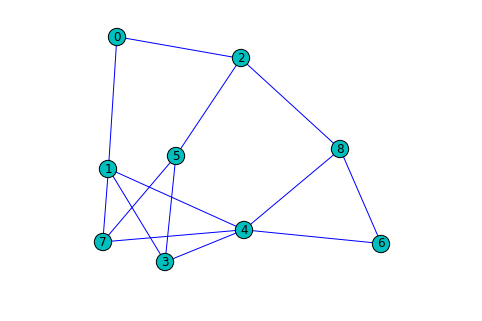

In [16]:
nx.draw(G, node_color='c',edge_color='b', with_labels=True)# in mod implicit graful este trasat 
                                                           #fara a afisa etichetele nodurilor
                                                           # with_labels=True conduce la afisarea lor

Pozitionarea relativa a nodurilor este realizata conform algoritmului numit [*spring layout algorithm*](http://wwwmayr.informatik.tu-muenchen.de/lehre/2012WS/algoprak/uebung/tutorial11.english.pdf). 

Exista mai multe modalitati de amplasare a nodurilor in spatiu, dar aceasta este cea mai convenabila pentru prezentarea noastra.

Extragem matricea de adiacenta a grafului:

In [17]:
A=nx.adjacency_matrix(G)#  A este un obiect al unei clase speciale in networkx

#A.todense() defineste matricea de adiacenta ca un obiect al unei clase din numpy, 
#dar NU clasa `numpy.array` 

print A.todense()

[[0 1 1 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 1 0]
 [1 0 0 0 0 1 0 0 1]
 [0 1 0 0 1 1 0 0 0]
 [0 1 0 1 0 0 1 1 1]
 [0 0 1 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 1]
 [0 1 0 0 1 1 0 0 0]
 [0 0 1 0 1 0 1 0 0]]


In [18]:
print type(A.todense())

<class 'numpy.matrixlib.defmatrix.matrix'>


Pentru a lucra doar cu `numpy.array`, convertim `A.todense()` (se pot determina valorile si vectorii proprii
ai lui `A.todense()`, dar e putin diferit de modul de lucru cu `numpy.array`):

In [19]:
A=np.array(A.todense())# interpretati aceasta linie ca un cast
print type(A)

<type 'numpy.ndarray'>


Sa determinam coeficientul de popularitate a nodurilor acestei retele. Cum graful asociat este neorientat
matricea de adiacenta este simetrica si deci are sigur toate radacinile polinomului caracteristic, reale (Cursul 12).


In [20]:

Lamb,V=np.linalg.eig(A)

lamb=np.amax(Lamb)# radacinile fiind reale, valoarea dominata este maximumul valorilor proprii
j=np.argmax(Lamb)#pozitia in Lamb a valorii maxime
print j
x=V[:,j]
print 'Valoarea proprie dominanta este:', lamb
print 'Vectorul propriu corespunzator:\n', x.round(3)

0
Valoarea proprie dominanta este: 3.34433739587
Vectorul propriu corespunzator:
[-0.195 -0.424 -0.23  -0.361 -0.499 -0.285 -0.236 -0.361 -0.288]


Sa determinam vectorul rating  asociat nodurilor retelei:

In [21]:
s=np.sum(x)
rating=x/s # vectorul propriu dominant, normalizat
print 'Vectorul rating al nodurilor\n', rating.round(3)

Vectorul rating al nodurilor
[ 0.068  0.147  0.08   0.125  0.173  0.099  0.082  0.125  0.1  ]


In [22]:
ranking=np.argsort(rating)[::-1]
print ranking

[4 1 3 7 8 5 6 2 0]


Rezulta astfel ca nodul cu cea mai mare popularitate este nodul  4.

Coeficientul de popularitate este:

In [23]:
print rating [ranking[0]]

0.173431138148


Fiecarui nod dintr-o retea i se asociaza gradul, ca fiind numarul de noduri cu care este conectat
printr-un arc (drum de lungime 1).

Functia `grad=nx.degree(nod)` returneaza gradul unui nod, iar `grad=nx.degree(G)`, gradele tuturor
nodurilor retelei. In acest al doilea caz, grad este un dictionar, adica o structura de date in Python
ce consta dintr-o multime ordonata de perechi `cheie:valoare`, inserate intre acolade:

In [24]:
dictionar={'grupa1':35, 'grupa2':40, 'grupa3': 43, 'grupa4':45}
print dictionar
print dictionar.keys()
print 'In grupa 2 sunt', dictionar['grupa2'], 'studenti'


{'grupa4': 45, 'grupa1': 35, 'grupa3': 43, 'grupa2': 40}
['grupa4', 'grupa1', 'grupa3', 'grupa2']
In grupa 2 sunt 40 studenti


In [25]:
grad=nx.degree(G)
print 'Dictionarul gradelor nodurilor:', grad
print 'Gradul nodului 4, ce are ceam mai mare popularitate este:', grad[4]
    

Dictionarul gradelor nodurilor: {0: 2, 1: 4, 2: 3, 3: 3, 4: 5, 5: 3, 6: 2, 7: 3, 8: 3}
Gradul nodului 4, ce are ceam mai mare popularitate este: 5


Remarcam ca nodul 4 care are cel mai mare coeficient de popularitate are si cel mai mare
grad (este "cel mai conectat" nod din retea).

### **2.** Constructia grafului neorientat pornind de la matricea sa de adiacenta.

Daca se da matricea de adiacenta, $A$,  a unui graf atunci graful este creat de functia:

`G= nx.from_numpy_matrix(A)`:

Nodurile grafului sunt:
[0, 1, 2, 3, 4, 5, 6, 7]
Lista arcelor:
[(0, 1), (0, 2), (0, 3), (0, 7), (1, 2), (1, 4), (1, 5), (1, 6), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (5, 6), (6, 7)]


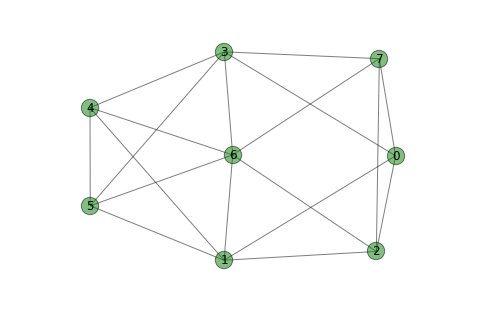

In [29]:
Ad=np.array([[0,1,1,1,0,0,0,1],
             [1,0,1,0,1,1,1,0],
             [1,1,0,0,0,0,1,1],
             [1,0,0,0,1,1,1,1],
             [0,1,0,1,0,1,1,0],
             [0,1,0,1,1,0,1,0],
             [0,1,1,1,1,1,0,1],
             [1,0,1,1,0,0,1,0]], float)
Gr=nx.from_numpy_matrix(Ad)
print 'Nodurile grafului sunt:\n', Gr.nodes()
print 'Lista arcelor:\n', Gr.edges()
nx.draw(Gr, node_color='g', with_labels=True, alpha=0.5)
# alpha este parametrul de transparenta a culorii nodurilor

#### Popularitatea nodurilor unei retele orientate

Constructia unei retele (graf) orientat se realizeaza la fel ca in cazul celor neorientate,
doar ca obiectul nu mai este declarat de tip `Graph`, ci `DiGraph`.


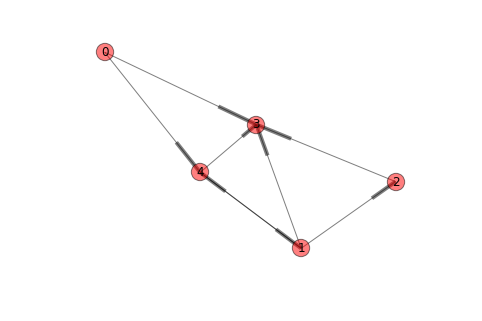

In [34]:
H=nx.DiGraph()
n=5
Noduri=[k for k in range(n)]
Arce=[(0,3), (0,4), (1,2),(1,3), (1,4), (2,3), (4,1), (4,3)]
H.add_nodes_from(Noduri)
H.add_edges_from(Arce)
nx.draw(H, node_color='r', with_labels=True, alpha=0.5)


Sa construim o retea orientata din matricea sa adiacenta si sa determinam popularitatea nodurilor:

In [35]:
plt.rcParams['figure.figsize'] = 8, 8  #setam dimensiunile figurii

Nodurile grafului sunt:
[0, 1, 2, 3, 4, 5, 6, 7]
Lista arcelor:
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (1, 5), (1, 6), (2, 7), (3, 4), (3, 5), (4, 6), (5, 4), (5, 6), (6, 1), (6, 2), (6, 3), (6, 7), (7, 0), (7, 3)]


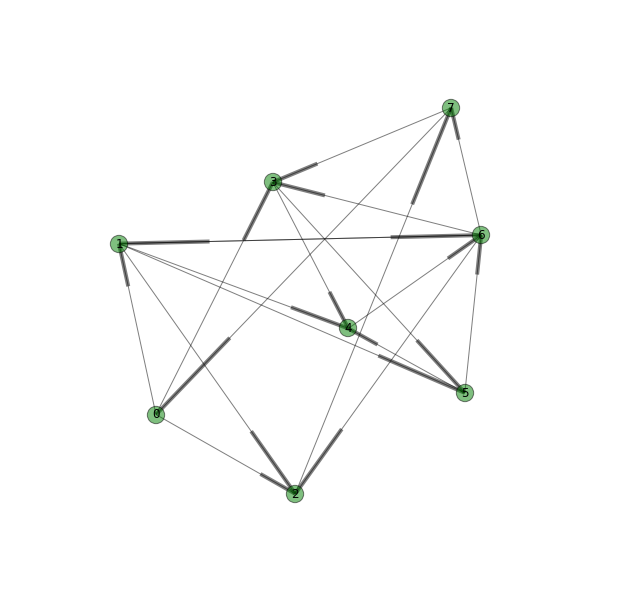

In [40]:
W=np.array([[0,1,1,1,0,0,0,0],[0,0,1,0,1,1,1,0],[0,0,0,0,0,0,0,1],[0,0,0,0,1,1,0,0],
            [0,0,0,0,0,0,1,0], [0,0,0,0,1,0,1,0],[0,1,1,1,0,0,0,1], [1,0,0,1,0,0,0,0]], float)
GW=nx.from_numpy_matrix(W, create_using=nx.DiGraph())
print 'Nodurile grafului sunt:\n', GW.nodes()
print 'Lista arcelor:\n', GW.edges()
nx.draw(GW, node_color='g',  with_labels=True, alpha=0.5)

Conform teoriei din cursul 11, vectorul rating asociat unei retele orientate este vectorul propriu
al valorii proprii dominante a matricii de conectivitate, transpusa:

In [41]:
Lamb, V=np.linalg.eig(W.transpose()) # aflam radacinile polinomului caracteristic a matricii W^T
print Lamb.round(3)

[ 2.272+0.j    -0.711+1.077j -0.711-1.077j  0.079+1.108j  0.079-1.108j
  0.000+0.j    -0.303+0.j    -0.705+0.j   ]


Matricea de adiacenta nefiind simetrica, polinomul sau caracteristic poate avea si radacini complex conjugate. Radacinile reale sunt afisate
si ele in forma complexa, $a=a+ 0.j$ (in Python numarul complex $i=\sqrt{-1}$ este notat $j$, ca in electronica).

Determinam acum valoarea proprie dominanta, adica radacina reala, pozitiva,   care domina valorile absolute ale celorlalte:

In [42]:
absLamb=np.abs(Lamb)
j=np.argmax(absLamb)
if not np.isreal(Lamb[j]):# daca valoarea absoluta maxima nu este reala
    raise ValueError("matricea A nu indeplineste conditiile T Perron-Frobenius sau alta cauza")
else:
    lamD=np.real(Lamb[j])# afiseaza nr real fara 0*j
    print 'valoarea proprie dominanta este:', lamD
    print 'valorile absolute ale radacinilor sunt:\n', absLamb.round(3)
    x=V[:,j]
    s=np.sum(x)
    rating=x/s
    print 'Vectorul rating:\n', np.real(rating.round(3))# fortam sa afiseze coordonatele fara 0.j
    ranking=np.argsort(rating)[::-1]
    print 'Nodurile in ordinea descrescatoare a popularitatii lor:\n', ranking 
    print 'Nodul cel mai important este:', ranking[0] 


valoarea proprie dominanta este: 2.27227147357
valorile absolute ale radacinilor sunt:
[ 2.272  1.291  1.291  1.111  1.111  0.     0.303  0.705]
Vectorul rating:
[ 0.057  0.095  0.137  0.153  0.157  0.109  0.159  0.131]
Nodurile in ordinea descrescatoare a popularitatii lor:
[6 4 3 2 7 5 1 0]
Nodul cel mai important este: 6


Tema de proiect data in anul universitar trecut:

### Determinarea popularitatii jucatorilor unei echipe de fotbal la Campionatul Mondial, Brazilia 2014

Sa se determine popularitatea jucatorilor unei echipe de fotbal intr-unul din meciurile jucate la campionatul Mondial de Fotbal, Brazilia 2014.


Reteaua asociata echipei implicata intr-un joc are ca noduri jucatorii (fara rezervele ce nu au intrat in jocul respectiv).
Exista arc orientat de la jucatorul i la jucatorul j, daca in cursul meciului numarul de pase de la i la j este nenul.

Notam cu $W$ matricea ponderare:
    $$W_{ij}=\mbox{numarul de pase de la i la j}$$
    Evident $W_{ij}=0$, daca jucatorul i nu a avut nicio pasa spre j. Aceasta matrice este nenegativa si la fel ca pentru matricea de adiacenta se poate aplica Teorema Perron-Frobenius pentru a afla popularitatea jucatorilor in cadrul echipei.


Datele pentru acest proiect le descarcati de la FIFA.

La adresa URL  [http://www.fifa.com/worldcup/statistics/matches/passes.html](http://www.fifa.com/worldcup/statistics/matches/passes.html)
dati click pe un meci, de exemplu Germania-Argentina si se deschide pagina:

[http://www.fifa.com/worldcup/matches/round=255959/match=300186501/index.html#games](http://www.fifa.com/worldcup/matches/round=255959/match=300186501/index.html#games)

De pe aceasta pagina descarcam fisierul [`Passing Distribution.pdf`](http://resources.fifa.com/mm/document/tournament/competition/02/40/51/17/64_0713_ger-arg_passingdistribution.pdf)



Copiati intr-un fisier `PaseNumeEchipa.txt` matricea paselor din tabelul cel mai din stanga. Evident, nu includeti ca nod, jucatorii de rezerva, neinclusi in meciul respectiv. 
De exemplu, jucatorul nr 17, Per MERTESACKER, din echipa Germaniei se vede ca n-a jucat in meciul cu Argentina.

Apoi o cititi astfel:

`W=np.loadtxt('PaseNumeEchipa.txt', dtype=float)`

Generati reteaua paselor setand in prealabil o figura de dimensiuni mai mari, ca sa fie vizualizate arcele cat mai bine. Aceasta setare se realizeaza inainte de a desena reteaua prin linia:

`plt.rcParams['figure.figsize'] = 10, 10`

Cu aceasta setare figura va fi de 10 pe 10. Puteti creste la 12 pe 12.

Creati apoi dictionarul jucatorilor. De exemplu in meciul Germania-Argentina, pe linia $i$ a matricii paselor jucatorilor germani, figureaza jucatorul 'Prenume Nume'. Astfel dictionarul `Jucatori` s-ar defini pentru Germania, astfel:

In [43]:
Jucatori={ 0: 'Manuel NEUER',
           1: 'Benedikt HOEWEDES', 
           2: 'Mats HUMMELS'}# etc

Avand  acest dictionar atunci cand am  calculat  vectorul `ranking`,  printam informatia in felul urmator:

Cel mai popular jucator (cel care a primit cele mai multe pase in timpul meciului) este
jucatorul `Jucatori[ranking[0]]`. 

`i=ranking[0]`este codul numeric al jucatorului, 
$i \in\{0,1, \ldots, n-1\}$,  cel mai bun, iar `Jucatori[i]` este numele acestuia extras din dictionar.

Alegeti meciuri diferite si echipe diferite, nu analizati toti echipa Germaniei.

O analiza mai detaliata a performantelor jucatorilor o vom putea efectua in semstrul II, dupa ce studiem 
Lanturi Markov la Probabilitati.

In [45]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()